In [1]:
#from google.colab import files
#files.upload()

# Ford GoBike
## Mariam Ahmed

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area with the following fields: 
 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type ("Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [3]:
# Uploads the dataset into a dataframe 
df = pd.read_csv("201902-fordgobike-tripdata.csv")
# Visually check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# View info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Check for duplicates 
df.duplicated().sum()

0

In [6]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Cleaning Data

In [7]:
# Create a different copy to our original dataframe to avoid corrupting it
df_clean = df.copy()

# Set a timestamp
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [8]:
# Categorize users by their user_type (customers or subscribers), gender, and sharing.
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [9]:
# Reset all the IDs to unify the new df objects
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [10]:
# View info of the edited dataframe 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Adding new data *feilds* to enhance the dataset

In [11]:
# Adding users age to the dataset fields
# Calculate users age by subtractibg their birth year from the current year
df_clean['member_age'] = 2021 - df_clean['member_birth_year']

In [12]:
# Adding the starting time month to the dataset fields
df_clean['start_time_month'] = df_clean['start_time'].dt.month.astype(int)

# Adding the starting time weekday to the dataset fields
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

# Adding the starting time hour to the dataset fields
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

In [13]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0,2,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,2,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0,2,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0,2,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,2,Thu,23


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In order to represent the variety of the users age, we chose box plot to show that distribution

The mean of ages: 36.19356312126385


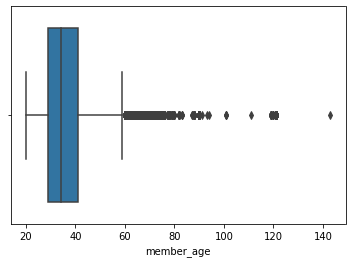

In [15]:
# Visually represent the users age distribution using boxplot
sb.boxplot(data=df_clean, x='member_age');
print("The mean of ages:",df_clean.member_age.mean())

In [16]:
df_clean.member_age.describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

As seen in the plot, there're age outliers that need to be removed for ages over 60.

In [17]:
# Only keep the data of users below or equal the age of 60
df_clean = df_clean.query('member_age <= 60')

In [18]:
df_clean.info()
# Save cleaned data
df_clean.to_csv('cleaned_file.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170186 non-null  int64         
 1   start_time               170186 non-null  datetime64[ns]
 2   end_time                 170186 non-null  datetime64[ns]
 3   start_station_id         170186 non-null  object        
 4   start_station_name       169992 non-null  object        
 5   start_station_latitude   170186 non-null  float64       
 6   start_station_longitude  170186 non-null  float64       
 7   end_station_id           170186 non-null  object        
 8   end_station_name         169992 non-null  object        
 9   end_station_latitude     170186 non-null  float64       
 10  end_station_longitude    170186 non-null  float64       
 11  bike_id                  170186 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset is a record of 183411 bike ride intery recorded in 2019 at San Fransisco Bay area.

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area with the following fields: 
 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type ("Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender

> The dataset was furtherly inhanced by given features to be more further informative:
- Users age
- Usage day & month

### What is/are the main feature(s) of interest in your dataset?

>  
  - The age range and gender of the users.
  - The variation of the demand through out the year and week days.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think users related data can give us prediction of the targeted customers and the start time indicates the patterns of the usage.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

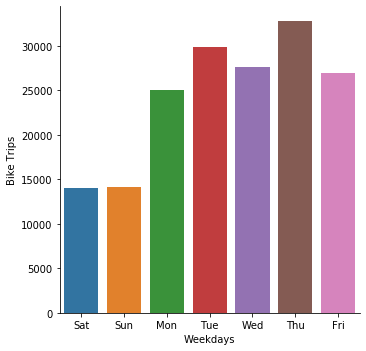

In [19]:
# weekday usege 

weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")


We can see the variety of usage between the weekdays, and that thursdays are the highest, while saturdays are the least.

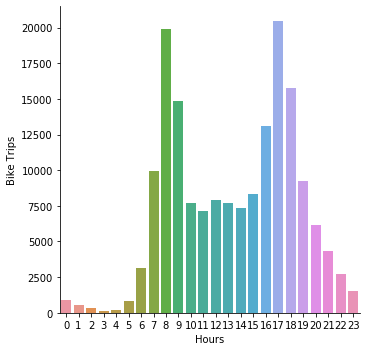

In [20]:
# hourly usege of the bike sharing system

g = sb.catplot(data=df_clean, x='start_time_hour', kind='count')
g.set_axis_labels("Hours", "Bike Trips")

We can observe flom the plot above that the time around 8 am and 5 pm are the highest usage times.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thursdays are the highest in bikes usage, while Saturdays and Sundays are the least, which makes sense because Saturdays and Sundays are holidays.
The time slot around 8 am and 5 pm are the highest usage times since they are the time of going/leaving work.
What is unusual is that the dataset was only abount month february of year 2019.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, the age outliers reached over 120 years, and since the majority of users are at the age between 20 and 57 years old with mean 35 years old, I removed the data of users over 60.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

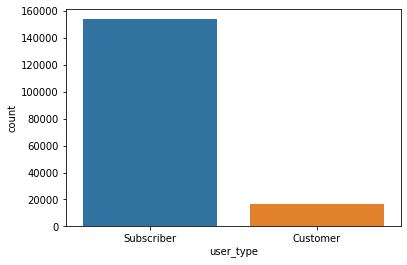

In [21]:
# Find the amount of the users who are customers and those who are subscribers
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

#normalize
n = df_clean['bike_id'].count()
ncustomer = customer / n
nsubscriber = subscriber / n

# Plot for comparison 
p = sb.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)

We can observe that the bike system is mainly used by subscribers.

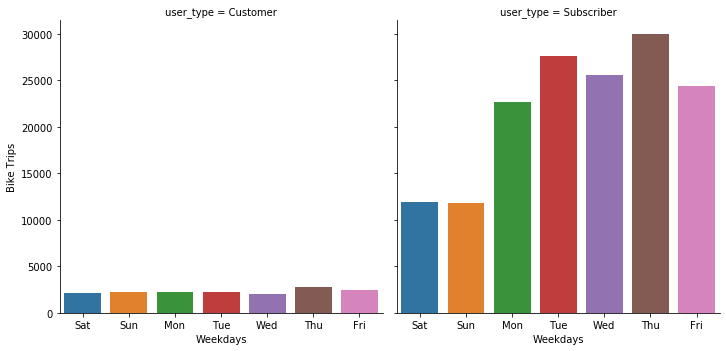

In [22]:
# Explore the usage of each user category in the weekdays
weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', col='user_type', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")

We can see the different trends between the two-user category, though in both categories bikes trips are higher on Thursdays.

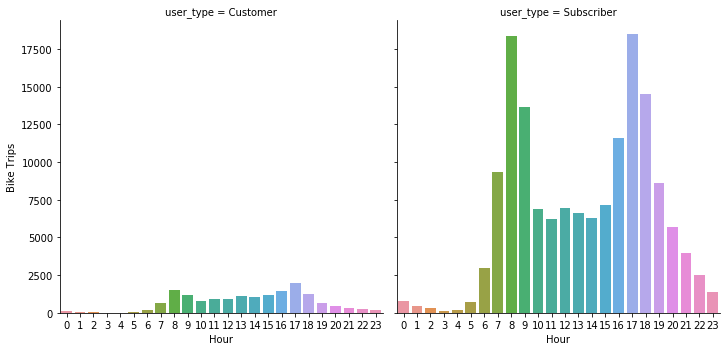

In [23]:
# Hourly usage for both user categories
p = sb.catplot(data=df_clean, x='start_time_hour', col='user_type', kind='count')
p.set_axis_labels("Hour", "Bike Trips")

Both user categories seem to follow the same pattern, with the difference of the ammount of users.

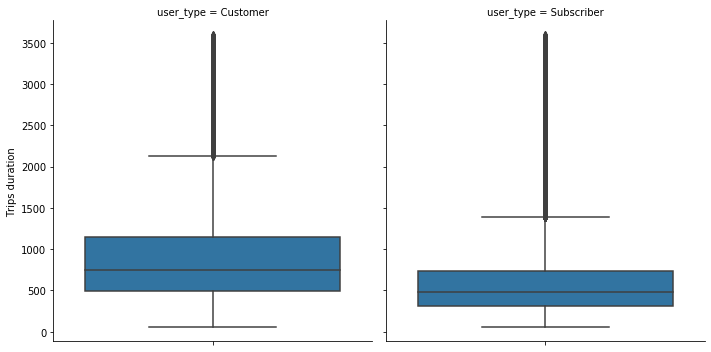

In [24]:
# Usage duration per user category

# first we remove the duration_sec outliers by the limit  of an hour 60x60
d = df_clean.query('duration_sec < 3600')
p = sb.catplot(data=d, y='duration_sec', col='user_type', kind='box')
p.set_axis_labels("", "Trips duration")


We can observe from the above box plots that the customers trips durations are longer than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First of all, we could observe that the bike system is mainly used by subscribers, though both of the subscribers and customers followed the almost the same weekday and hourly pattern of bike trips. Moreover, we found that customers trips durations are longer than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We observed the differnce in the trip duration between customers and subscribers, that customers trips are longer than for subscribers, probably because they are tourests, while the subscribers on the other hand use the system mainly for daily purposes and quick rides to and from work/school.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

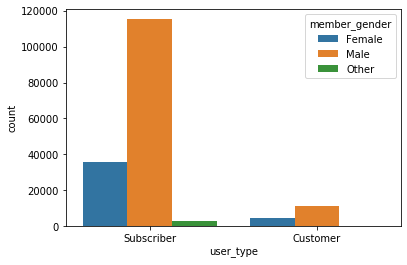

In [25]:
# Plot the gender difference in each user category
p = sb.countplot(data=df_clean, x='user_type', hue='member_gender', order=df_clean.user_type.value_counts().index)


We can see that males are more users in both users categories.

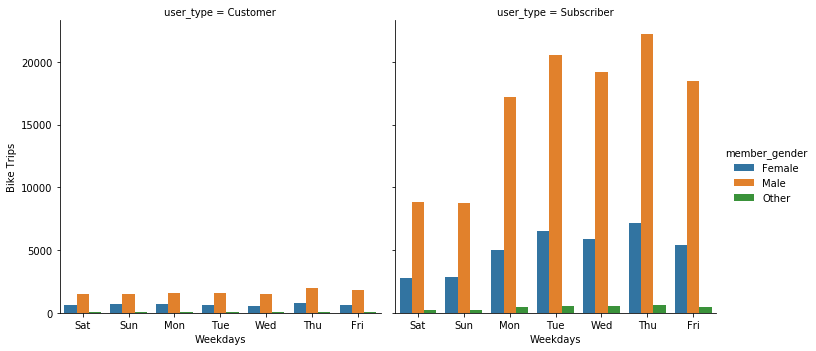

In [26]:
# Explore the usage by gender for each user category in the weekdays
weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', col='user_type', hue='member_gender', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")

However male users are more in both users categories, they are following the same pattern through out the week days.

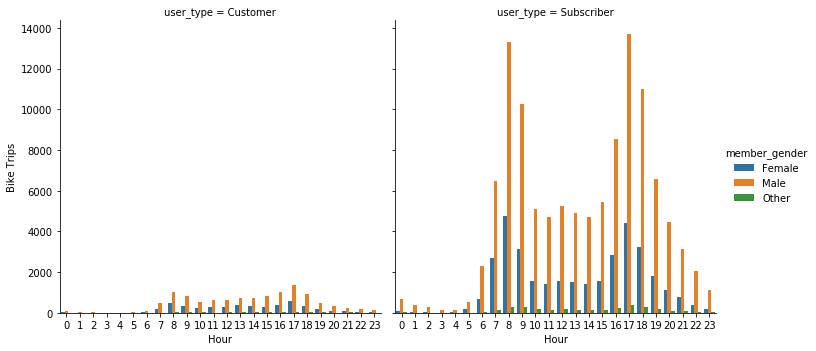

In [27]:
# Hourly usage by gender for both users categories
p = sb.catplot(data=df_clean, x='start_time_hour', col='user_type', hue='member_gender', kind='count')
p.set_axis_labels("Hour", "Bike Trips")

we can observe that both genders in both user categories are following the same pattern through day ours.

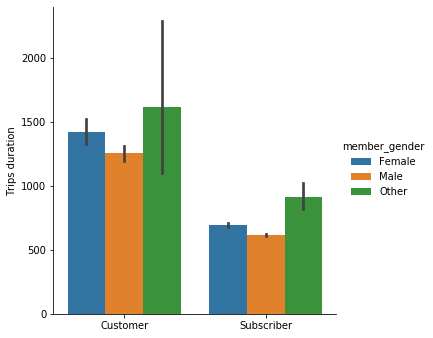

In [28]:
# Usage duration for both genders per user category
p = sb.catplot(data=df_clean ,x='user_type', y='duration_sec', hue='member_gender', kind='bar')
p.set_axis_labels("", "Trips duration")

We can observe from the plot above that females take longer durations in their bike rides than men for both user types cases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We observed that males are more in both users categories, but however, they are following the same pattern through out the week days as well as through out the daily hours. while females take longer trips than men for both user types cases.

### Were there any interesting or surprising interactions between features?

> I found it intersting that both males and females, regardless of their amount they both follow almost the same pattern